In [2]:
import pandas as pd

# Load the dataset
file_path = 'Online retail.xlsx'
data = pd.read_excel(file_path)

# Split the single column into lists of items
transactions = data.iloc[:, 0].apply(lambda x: x.split(','))

# Display the first few rows of the transactions
print(transactions.head())


0                           [burgers, meatballs, eggs]
1                                            [chutney]
2                                    [turkey, avocado]
3    [mineral water, milk, energy bar, whole wheat ...
4                                     [low fat yogurt]
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, dtype: object


In [4]:
from mlxtend.preprocessing import TransactionEncoder

# Initialize the transaction encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the transaction matrix into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the transformed DataFrame
print(df.head())


    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the rules
print(rules.head())


       antecedents      consequents  antecedent support  consequent support  \
0  (mineral water)        (avocado)            0.238267            0.033200   
1        (avocado)  (mineral water)            0.033200            0.238267   
2        (burgers)           (cake)            0.087200            0.081067   
3           (cake)        (burgers)            0.081067            0.087200   
4        (burgers)      (chocolate)            0.087200            0.163867   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011467    0.048125  1.449559  0.003556    1.015680       0.407144  
1  0.011467    0.345382  1.449559  0.003556    1.163629       0.320785  
2  0.011467    0.131498  1.622103  0.004398    1.058068       0.420154  
3  0.011467    0.141447  1.622103  0.004398    1.063185       0.417349  
4  0.017067    0.195719  1.194377  0.002777    1.039603       0.178291  


In [8]:
# Analyze the generated rules to identify interesting patterns
print(rules.sort_values(by='lift', ascending=False).head(10))


                    antecedents                 consequents  \
217               (ground beef)             (herb & pepper)   
216             (herb & pepper)               (ground beef)   
389               (ground beef)  (spaghetti, mineral water)   
384  (spaghetti, mineral water)               (ground beef)   
396  (spaghetti, mineral water)                 (olive oil)   
401                 (olive oil)  (spaghetti, mineral water)   
194         (frozen vegetables)                  (tomatoes)   
195                  (tomatoes)         (frozen vegetables)   
191         (frozen vegetables)                    (shrimp)   
190                    (shrimp)         (frozen vegetables)   

     antecedent support  consequent support   support  confidence      lift  \
217            0.098267            0.049467  0.016000    0.162822  3.291555   
216            0.049467            0.098267  0.016000    0.323450  3.291555   
389            0.098267            0.059733  0.017067    0.173677  2.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = 'Online retail.xlsx'
data = pd.read_excel(file_path)

# Split the single column into lists of items
transactions = data.iloc[:, 0].apply(lambda x: x.split(','))

# Initialize the transaction encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the transaction matrix into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


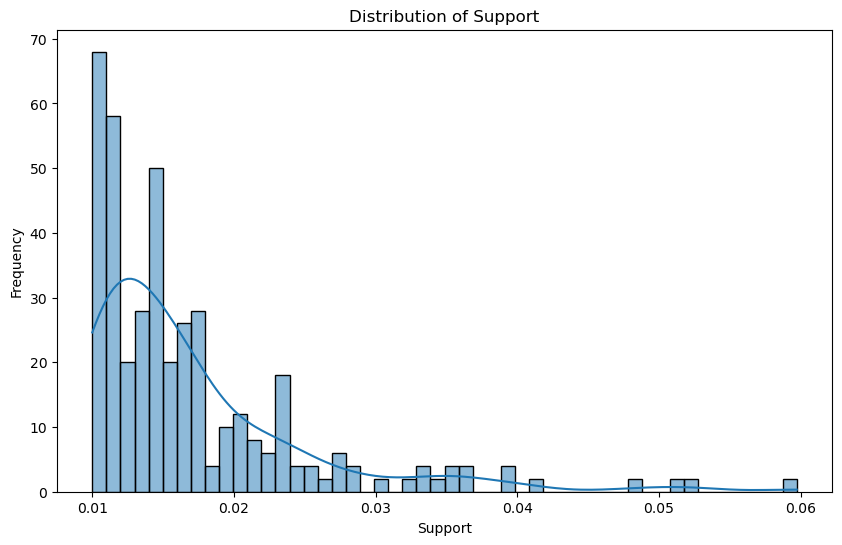

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


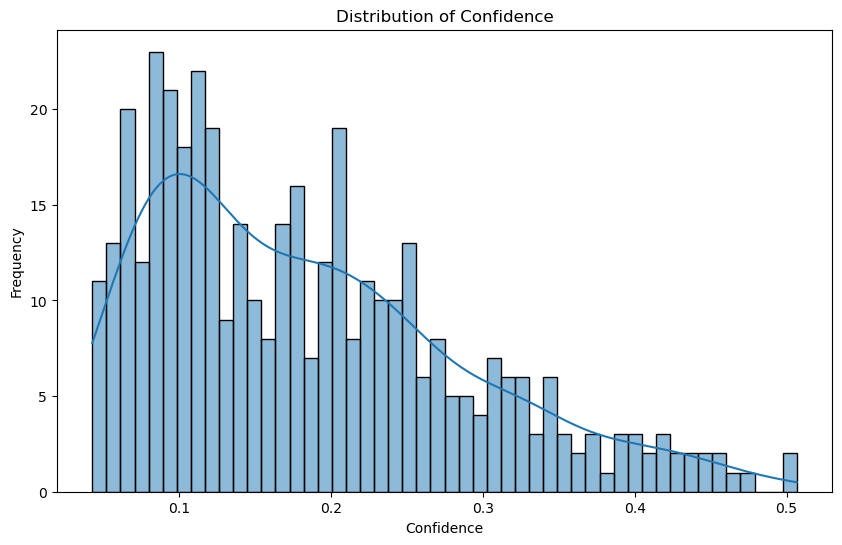

C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


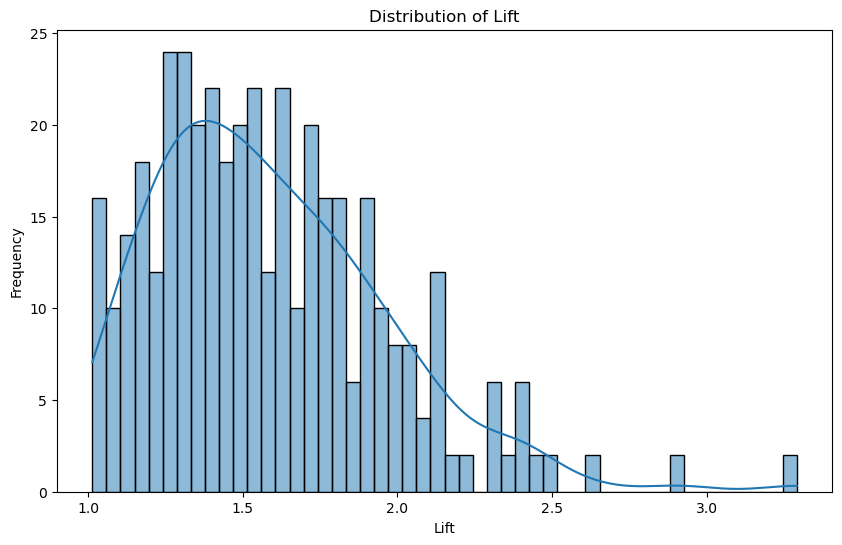

In [12]:
# Plot the distribution of support
plt.figure(figsize=(10, 6))
sns.histplot(rules['support'], bins=50, kde=True)
plt.title('Distribution of Support')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of confidence
plt.figure(figsize=(10, 6))
sns.histplot(rules['confidence'], bins=50, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of lift
plt.figure(figsize=(10, 6))
sns.histplot(rules['lift'], bins=50, kde=True)
plt.title('Distribution of Lift')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()


C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MY PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


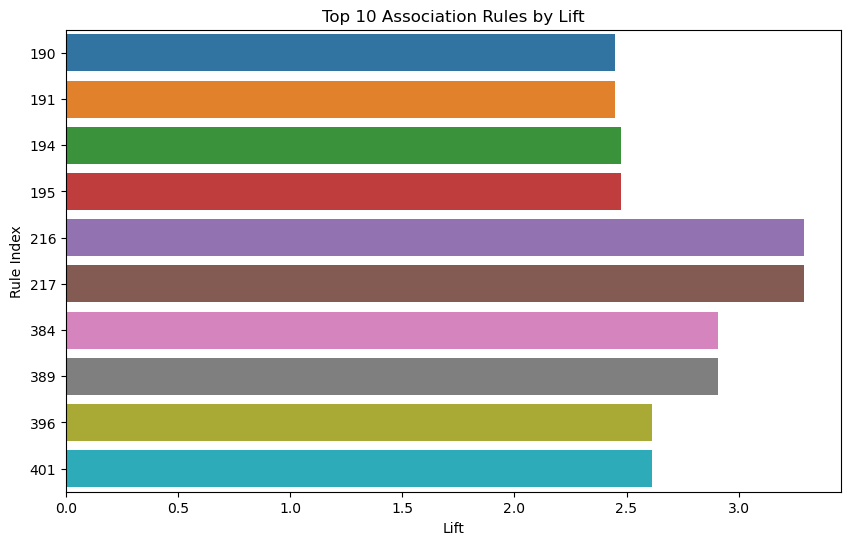

In [14]:
# Select the top 10 rules based on lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Plot the top rules
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, orient='h')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule Index')
plt.show()


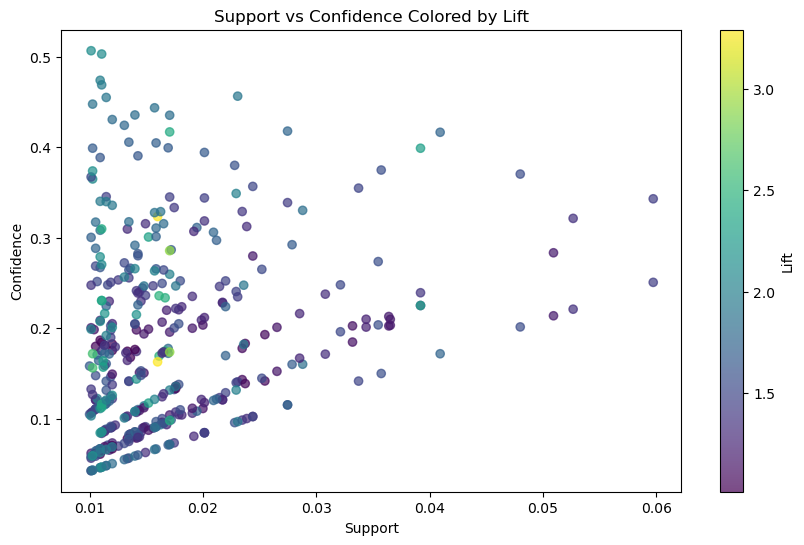

In [16]:
# Plot a scatter plot of support vs confidence with lift as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7)
plt.title('Support vs Confidence Colored by Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(scatter, label='Lift')
plt.show()
